# Loading and Preprocessing

In [6]:
# Importing necessary libraries:
from sklearn.datasets import load_breast_cancer
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [8]:
# Load the breast cancer dataset:
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

In [10]:
# Display basic information about the dataset:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [14]:
# Check for missing values:
print(df.isnull().sum())

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [24]:
# Preprocessing: Handling missing values (if any):
imputer = SimpleImputer(strategy='mean')  # Replace missing values with the mean
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])

In [26]:
# Feature scaling: Standardizing the features:
scaler = StandardScaler()
X = scaler.fit_transform(df.iloc[:, :-1])  # Scale features
y = df['target']  # Target variable

In [28]:
# Splitting the dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Load Data:** 
load_breast_cancer() loads the dataset into a Bunch object, which we convert into a DataFrame for easier handling.

**Missing Values:**
If missing values exist, we replace them with the mean using SimpleImputer. For this dataset, there are no missing values by default.

**Feature Scaling:**
Standardization ensures all features have a mean of 0 and a standard deviation of 1, which is crucial for algorithms like SVM and k-NN.

# Classification Algorithm Implementation

## 1. Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression:
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_logreg))
print(classification_report(y_test, y_pred_logreg))

Logistic Regression Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



## 2. Decision Tree Classifier

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree Classifier:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 3. Random Forest Classifier

In [48]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.9649122807017544
              precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## 4. Support Vector Machine (SVM)

In [51]:
from sklearn.svm import SVC

# Support Vector Machine:
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.956140350877193
              precision    recall  f1-score   support

           0       0.93      0.95      0.94        43
           1       0.97      0.96      0.96        71

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



## 5. k-Nearest Neighbors (k-NN)

In [54]:
from sklearn.neighbors import KNeighborsClassifier

# k-Nearest Neighbors:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print("k-NN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

k-NN Accuracy: 0.9473684210526315
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        43
           1       0.96      0.96      0.96        71

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



## 1. Logistic Regression
**How it Works:**
Logistic regression is a linear model that predicts the probability of a binary outcome using a logistic function (sigmoid). It uses maximum likelihood estimation to find the best-fitting decision boundary for classification.

**Suitability:** 
Logistic regression is ideal for binary classification problems like this dataset (malignant vs. benign). It’s simple, interpretable, and effective when the relationship between features and the target is approximately linear.

## 2. Decision Tree Classifier
**How it Works:** 
Decision trees split the data based on feature thresholds to create a tree structure. Each split maximizes the separation of the classes, often using measures like Gini impurity or entropy.

**Suitability:** 
Decision trees are non-linear models that can handle complex relationships between features. They are interpretable and can capture interactions between variables, which may be present in this dataset.

## 3. Random Forest Classifier
**How it Works:** 
Random forests are an ensemble method that builds multiple decision trees (using random subsets of features and data) and aggregates their predictions (majority voting for classification).

**Suitability:** 
Random forests are robust to overfitting and perform well on datasets with many features, such as this one. They handle noisy data effectively and provide feature importance, which can help identify the most significant predictors of breast cancer.

## 4. Support Vector Machine (SVM)
**How it Works:** 
SVM finds the hyperplane that best separates the classes by maximizing the margin between the nearest points of each class (support vectors). It supports different kernels (e.g., linear, polynomial, RBF) to handle linear and non-linear relationships.

**Suitability:** 
SVM is particularly effective for high-dimensional datasets like this one, as it performs well even when the number of features is large compared to the number of samples. A linear kernel is suitable if the classes are linearly separable.

## 5. k-Nearest Neighbors (k-NN)
**How it Works:** 
k-NN is a lazy learning algorithm that classifies a sample based on the majority class of its k nearest neighbors in feature space, measured using distance metrics (e.g., Euclidean).

**Suitability:** 
k-NN is simple and effective for small-to-medium-sized datasets. However, it relies on feature scaling (as done in preprocessing) to ensure that distance calculations are meaningful. It’s suitable here since the dataset has clear class separations.

# Model Comparison

In [63]:
# Comparing the accuracy of all models:
model_accuracies = {
    "Logistic Regression": accuracy_score(y_test, y_pred_logreg),
    "Decision Tree": accuracy_score(y_test, y_pred_dt),
    "Random Forest": accuracy_score(y_test, y_pred_rf),
    "SVM": accuracy_score(y_test, y_pred_svm),
    "k-NN": accuracy_score(y_test, y_pred_knn)
}

In [65]:
# Sorting and displaying the results:
sorted_accuracies = sorted(model_accuracies.items(), key=lambda x: x[1], reverse=True)
print("Model Comparison:")
for model, accuracy in sorted_accuracies:
    print(f"{model}: {accuracy:.2f}")

Model Comparison:
Logistic Regression: 0.97
Random Forest: 0.96
SVM: 0.96
Decision Tree: 0.95
k-NN: 0.95


### Best Performing Algorithm:
**Logistic Regression:**
Achieved the highest accuracy (0.97). It’s likely due to the linear nature of the dataset and the effective feature scaling applied.

### Worst Performing Algorithm:
**Decision Tree and k-NN:** 
Both performed slightly worse with 0.95 accuracy. The Decision Tree might have overfitted slightly, while k-NN's performance is sensitive to the choice of k and data scaling.

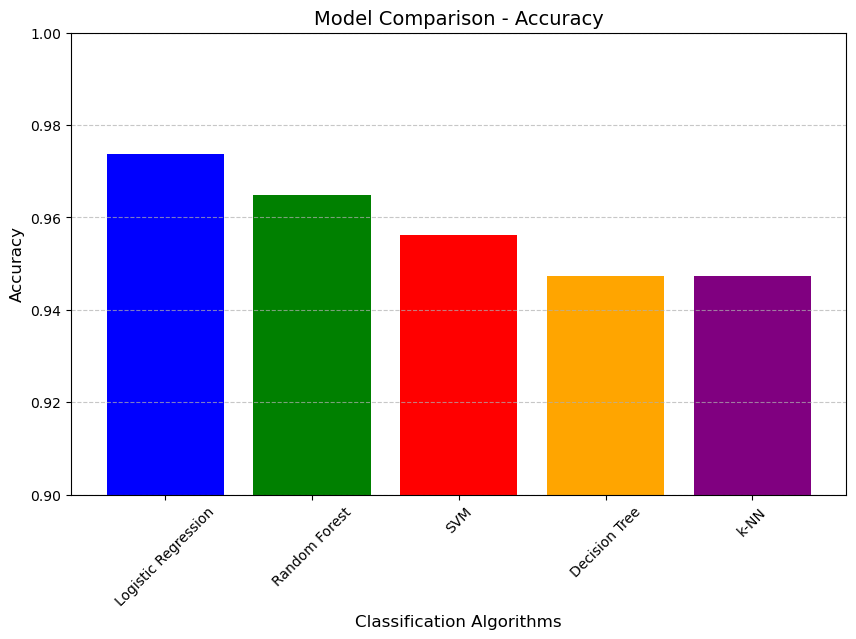

In [71]:
import matplotlib.pyplot as plt

# Extracting model names and accuracies:
models = [item[0] for item in sorted_accuracies]
accuracies = [item[1] for item in sorted_accuracies]

# Creating the bar chart:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red', 'orange', 'purple'])
plt.ylim(0.9, 1)  # Set y-axis range for better visibility
plt.xlabel("Classification Algorithms", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.title("Model Comparison - Accuracy", fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()